# Upgrade pip for safer side

In [1]:
!python -m pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 41.8 MB/s eta 0:00:0000:01
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0


In [2]:
!pip install ultralytics
!pip install -U ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 70.6 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.9
    Uninstalling widgetsnbextension-3.6.9:
      Successfully uninstalled widgetsnbextension-3.6.9
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab_widgets 3.0.11
    Uninstalling jupyterlab_widgets-3.0.11:
      Successfully uninstalled jupyterlab_widgets-3.0.11
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.22.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.10.0, but you have google-c

In [3]:
import os
import torch
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Install all the required libraries

In [6]:
!git clone https://github.com/WongKinYiu/yolov7.git       # clone
%cd yolov7
!pip install -r requirements.txt      # install modules
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt # download pretrained weight

Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197 (from 1)
Receiving objects: 100% (1197/1197), 74.23 MiB | 29.10 MiB/s, done.
Resolving deltas: 100% (520/520), done.
/kaggle/working/yolov7
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 78.1 MB/s eta 0:00:00:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 24.8.3 requires cubinlinker, which is not installed.
cudf 24.8.3 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf 24.8.3 requires ptxcompiler, which is not installed.
cuml 24.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 24.8.3 requires cupy-cuda11x>=12.0.0, which is not insta

# Check the GPU availability

In [7]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


# Go inside the YOLOv7 codebase

In [8]:
%cd /kaggle/working/yolov7

/kaggle/working/yolov7


# Copy the entire dataset from /kaggle/input/c2a-dataset to /kaggle/working

I have to additionally do this copy because, when we train the model using `/kaggle/input/c2a-dataset` path, it throws the following error

`RuntimeError: File /kaggle/input/c2a-dataset/C2A_Dataset/new_dataset3/train/labels.cache cannot be opened.`

In [17]:
!cp -r /kaggle/input/c2a-dataset /kaggle/working

# Create the data.yaml file

In [19]:
content = """
# Paths to dataset directories
train: /kaggle/working/c2a-dataset/C2A_Dataset/new_dataset3/train/images
val: /kaggle/working/c2a-dataset/C2A_Dataset/new_dataset3/val/images
test: /kaggle/working/c2a-dataset/C2A_Dataset/new_dataset3/test/images

# Number of classes
nc: 1

# Class names
names: ['person']
"""

# Save data.yaml in the working directory
with open('/kaggle/working/data.yaml', 'w') as file:
    file.write(content)

print("data.yaml is created at /kaggle/working/")

data.yaml is created at /kaggle/working/


In [20]:
# Open and check the data.yaml file to ensure tha paths are correct
!cat /kaggle/working/data.yaml


# Paths to dataset directories
train: /kaggle/working/c2a-dataset/C2A_Dataset/new_dataset3/train/images
val: /kaggle/working/c2a-dataset/C2A_Dataset/new_dataset3/val/images
test: /kaggle/working/c2a-dataset/C2A_Dataset/new_dataset3/test/images

# Number of classes
nc: 1

# Class names
names: ['person']


In [21]:
!ls -lrt /kaggle/working/c2a-dataset/C2A_Dataset/new_dataset3

total 16
drwxr-xr-x 4 root root 4096 Dec  1 04:15  train
drwxr-xr-x 4 root root 4096 Dec  1 04:16  test
drwxr-xr-x 3 root root 4096 Dec  1 04:16 'All labels with Pose information'
drwxr-xr-x 4 root root 4096 Dec  1 04:18  val


# Train the C2A dataset using YOLOv7 model

## Disable wandb

In [22]:
import os
os.environ["WANDB_MODE"] = "offline"

## Train C2A dataset on YOLOv7 base model

In [23]:
!python train.py --weights yolov7.pt --data "/kaggle/working/data.yaml" --workers 8 --batch-size 8 --img 640 --cfg cfg/training/yolov7.yaml --name yolov7 --epochs 3 --hyp data/hyp.scratch.p5.yaml

/kaggle/working/yolov7/train.py:71: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  run_id = torch.load(weights, map_location=device).get('wandb_id') if weights.endswith('.pt'

# Validate and Detect Humans from the images

In [24]:
!python test.py --data /kaggle/working/data.yaml --img 640 --batch 8 --conf 0.35 --iou 0.65 --device 0 --weights /kaggle/working/yolov7/runs/train/yolov72/weights/best.pt --name yolov7_416_val

Namespace(weights=['/kaggle/working/yolov7/runs/train/yolov72/weights/best.pt'], data='/kaggle/working/data.yaml', batch_size=8, img_size=640, conf_thres=0.35, iou_thres=0.65, task='val', device='0', single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='yolov7_416_val', exist_ok=False, no_trace=False, v5_metric=False)
/kaggle/working/yolov7/models/experimental.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allo

In [25]:
!python detect.py --weights /kaggle/working/yolov7/runs/train/yolov72/weights/best.pt --source "/kaggle/working/c2a-dataset/C2A_Dataset/new_dataset3/test/images"

Namespace(weights=['/kaggle/working/yolov7/runs/train/yolov72/weights/best.pt'], source='/kaggle/working/c2a-dataset/C2A_Dataset/new_dataset3/test/images', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
/kaggle/working/yolov7/models/experimental.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed

# Display few images to see how the humans are detected

In [26]:
from IPython.display import Image
images_base_path = "/kaggle/working/yolov7/runs/detect/exp"

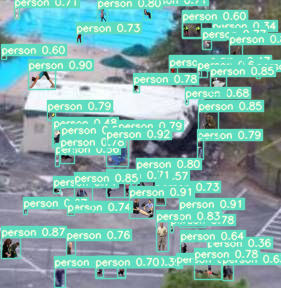

In [27]:
Image(filename=f"{images_base_path}/collapsed_building_image0001_3.png")

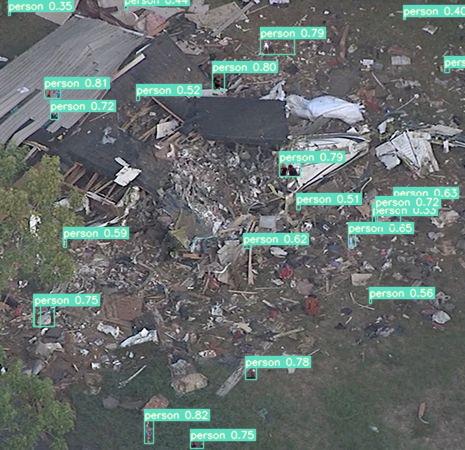

In [28]:
Image(filename=f"{images_base_path}/collapsed_building_image0004_1.png")

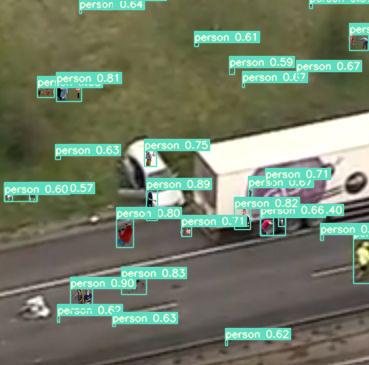

In [29]:
Image(filename=f"{images_base_path}/traffic_incident_image0472_1.png")

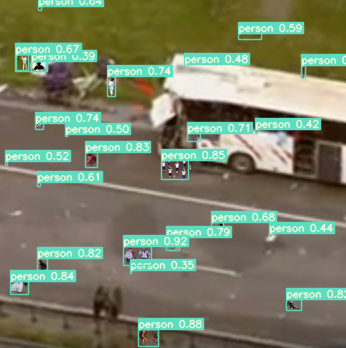

In [30]:
Image(filename=f"{images_base_path}/traffic_incident_image0482_0.png")

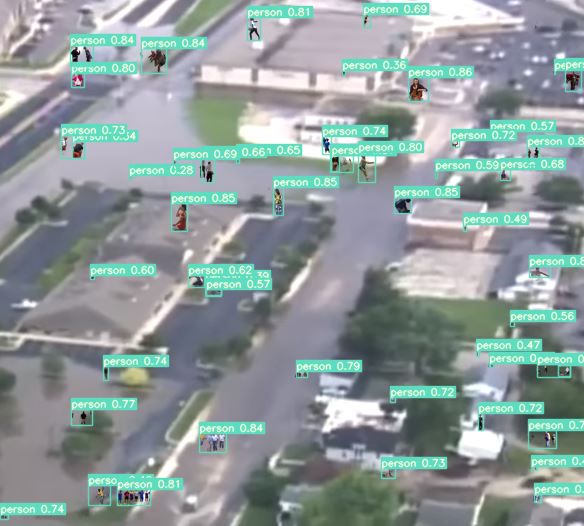

In [31]:
Image(filename=f"{images_base_path}/flood_image0172_2.png")

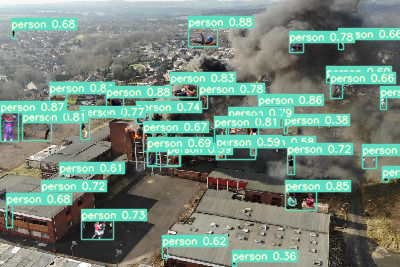

In [32]:
Image(filename=f"{images_base_path}/fire_image0078_3.png")

# Visualize all the Metrics and Results

In [34]:
results_base_path = "/kaggle/working/yolov7/runs/train/yolov72"

## F1_curve

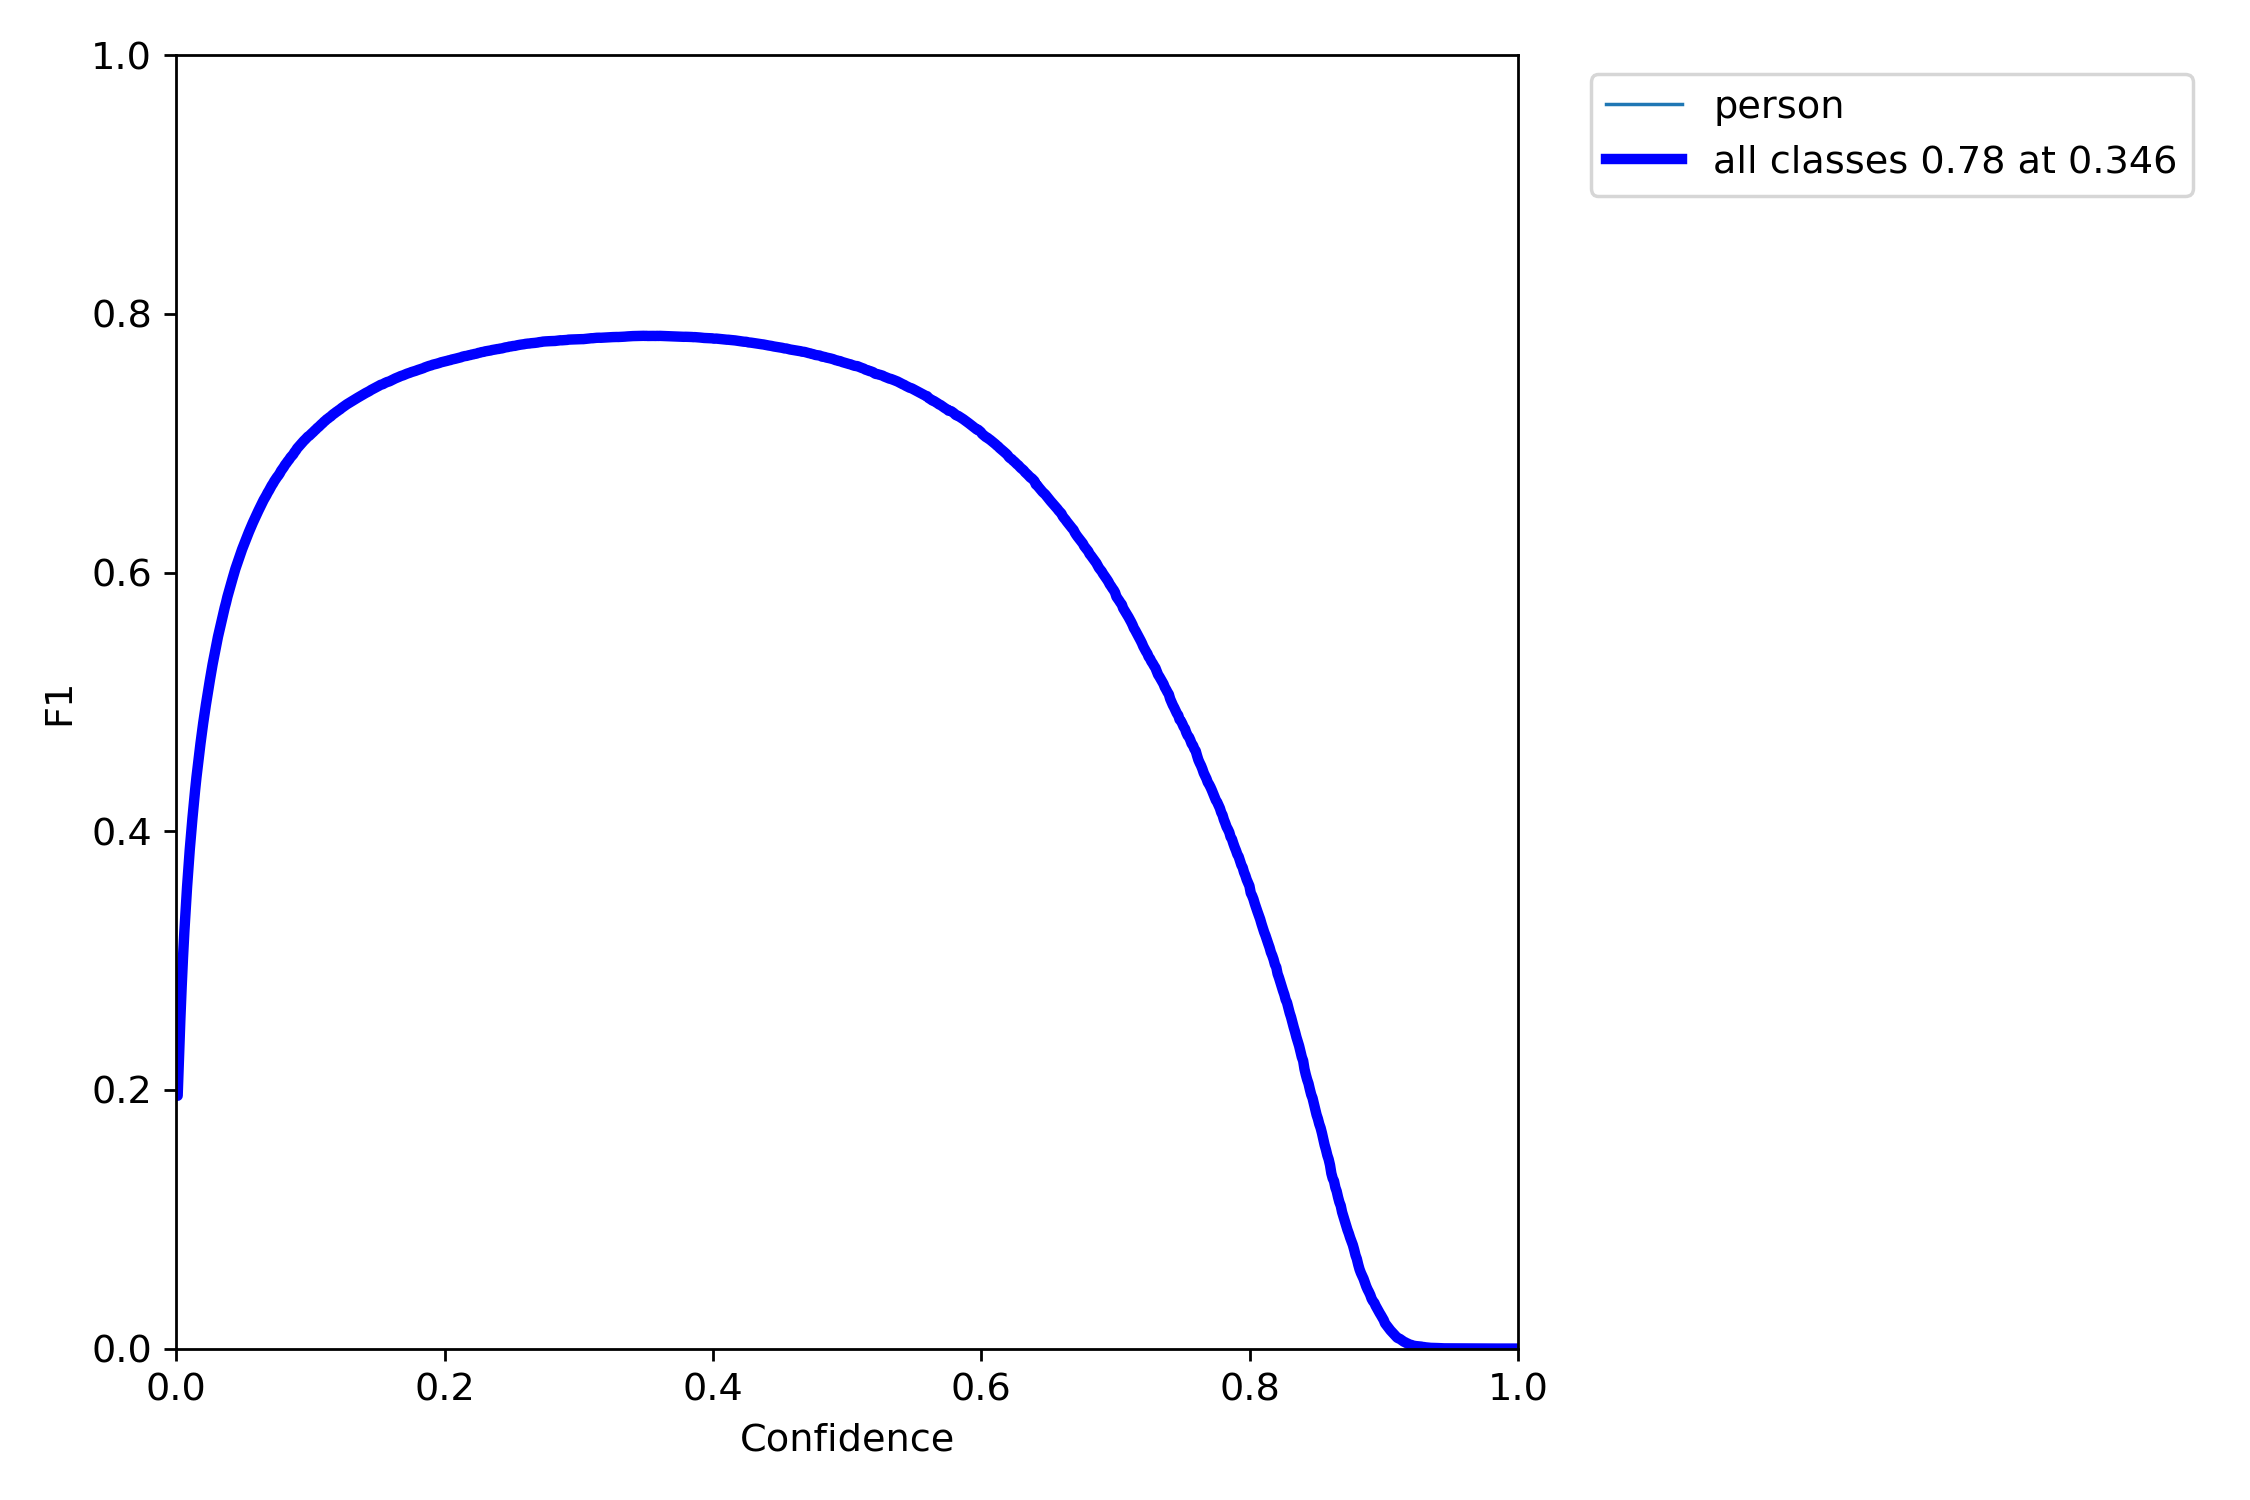

In [36]:
Image(filename=f"{results_base_path}/F1_curve.png")

## PR_curve

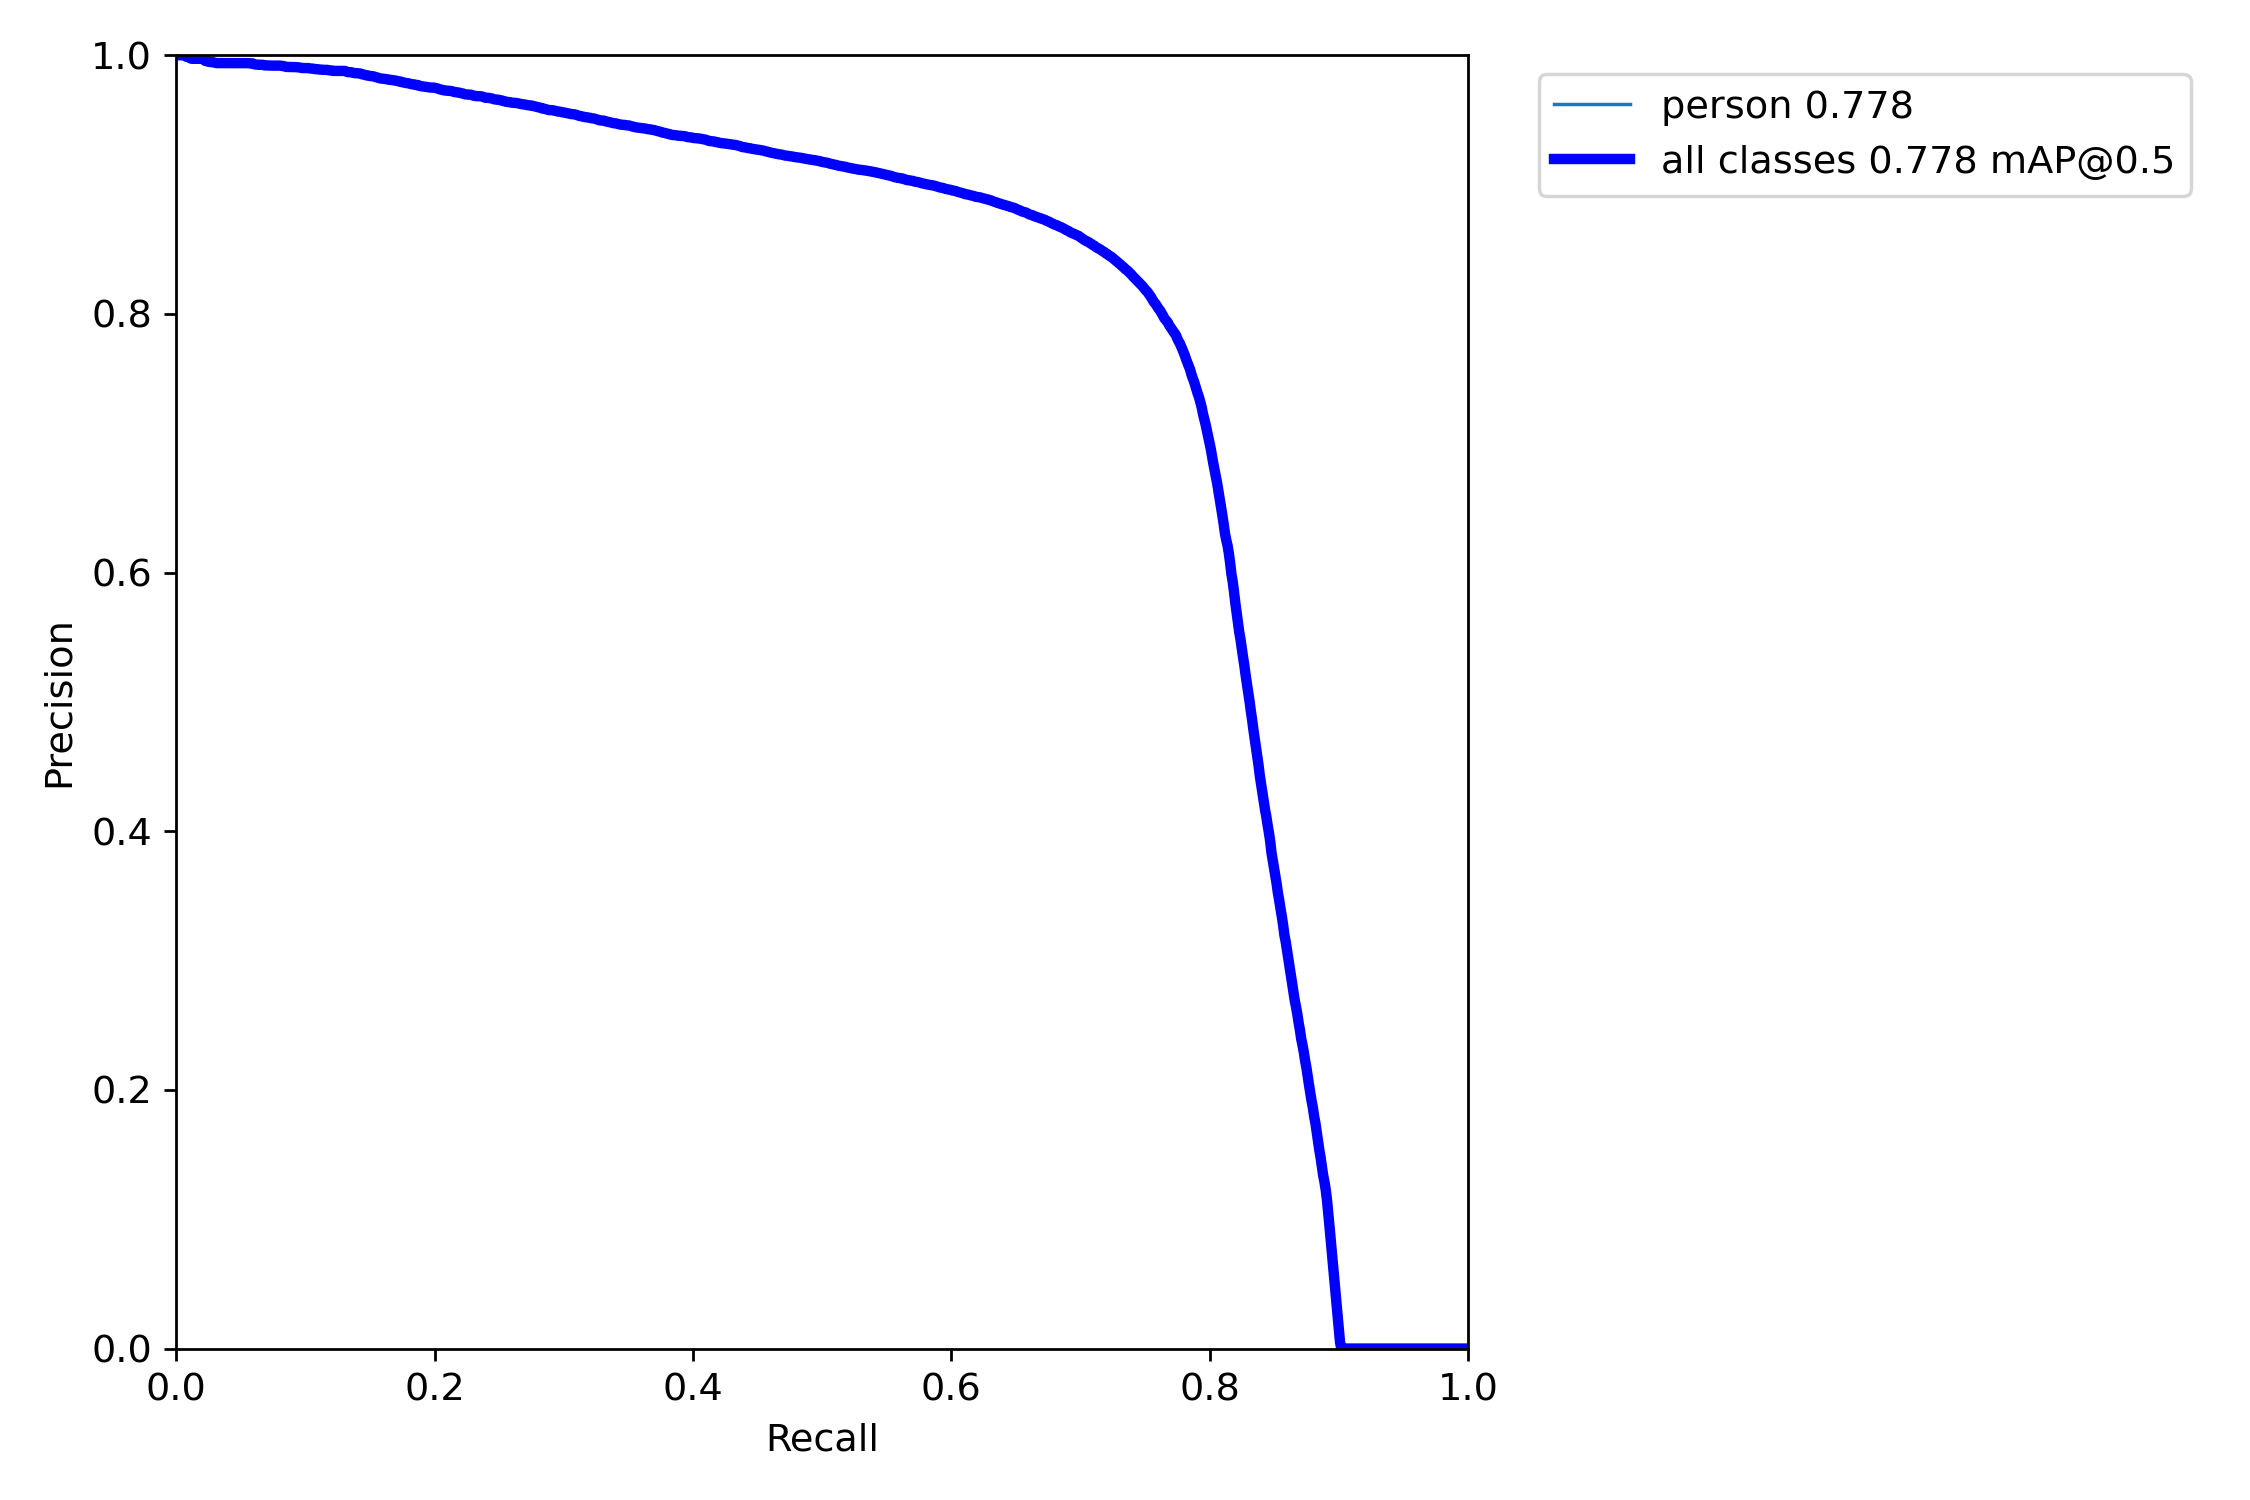

In [37]:
Image(filename=f"{results_base_path}/PR_curve.png")

## P_curve

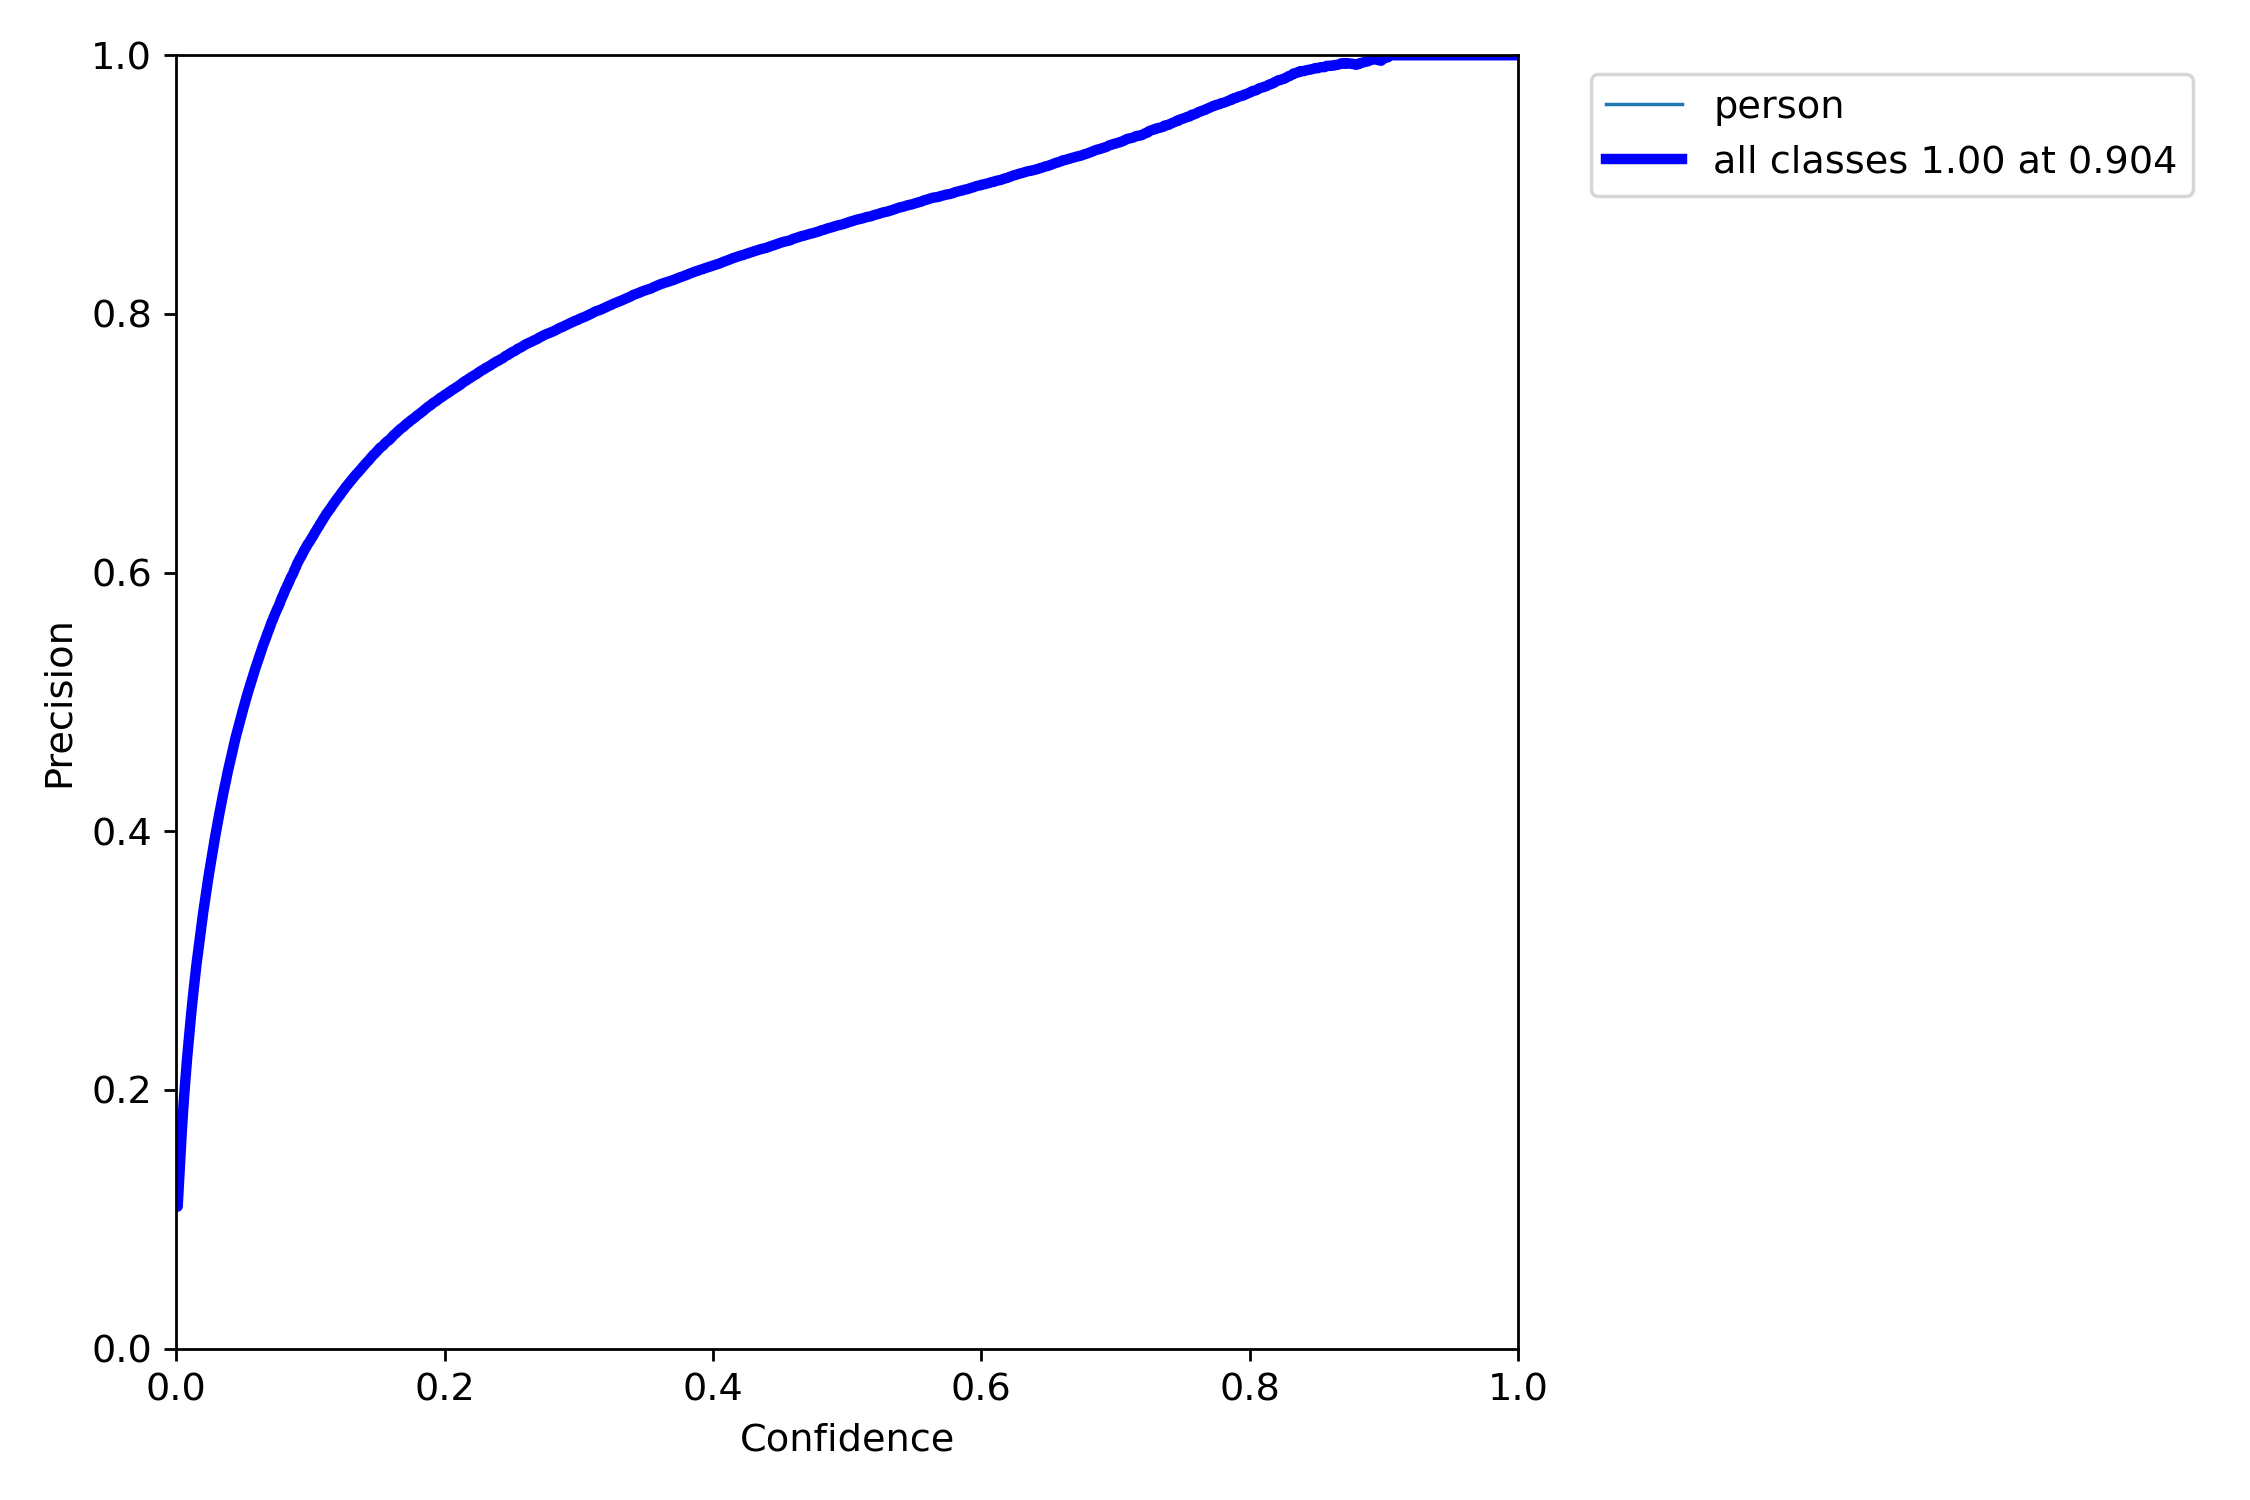

In [41]:
Image(filename=f"{results_base_path}/P_curve.png")

## R_curve

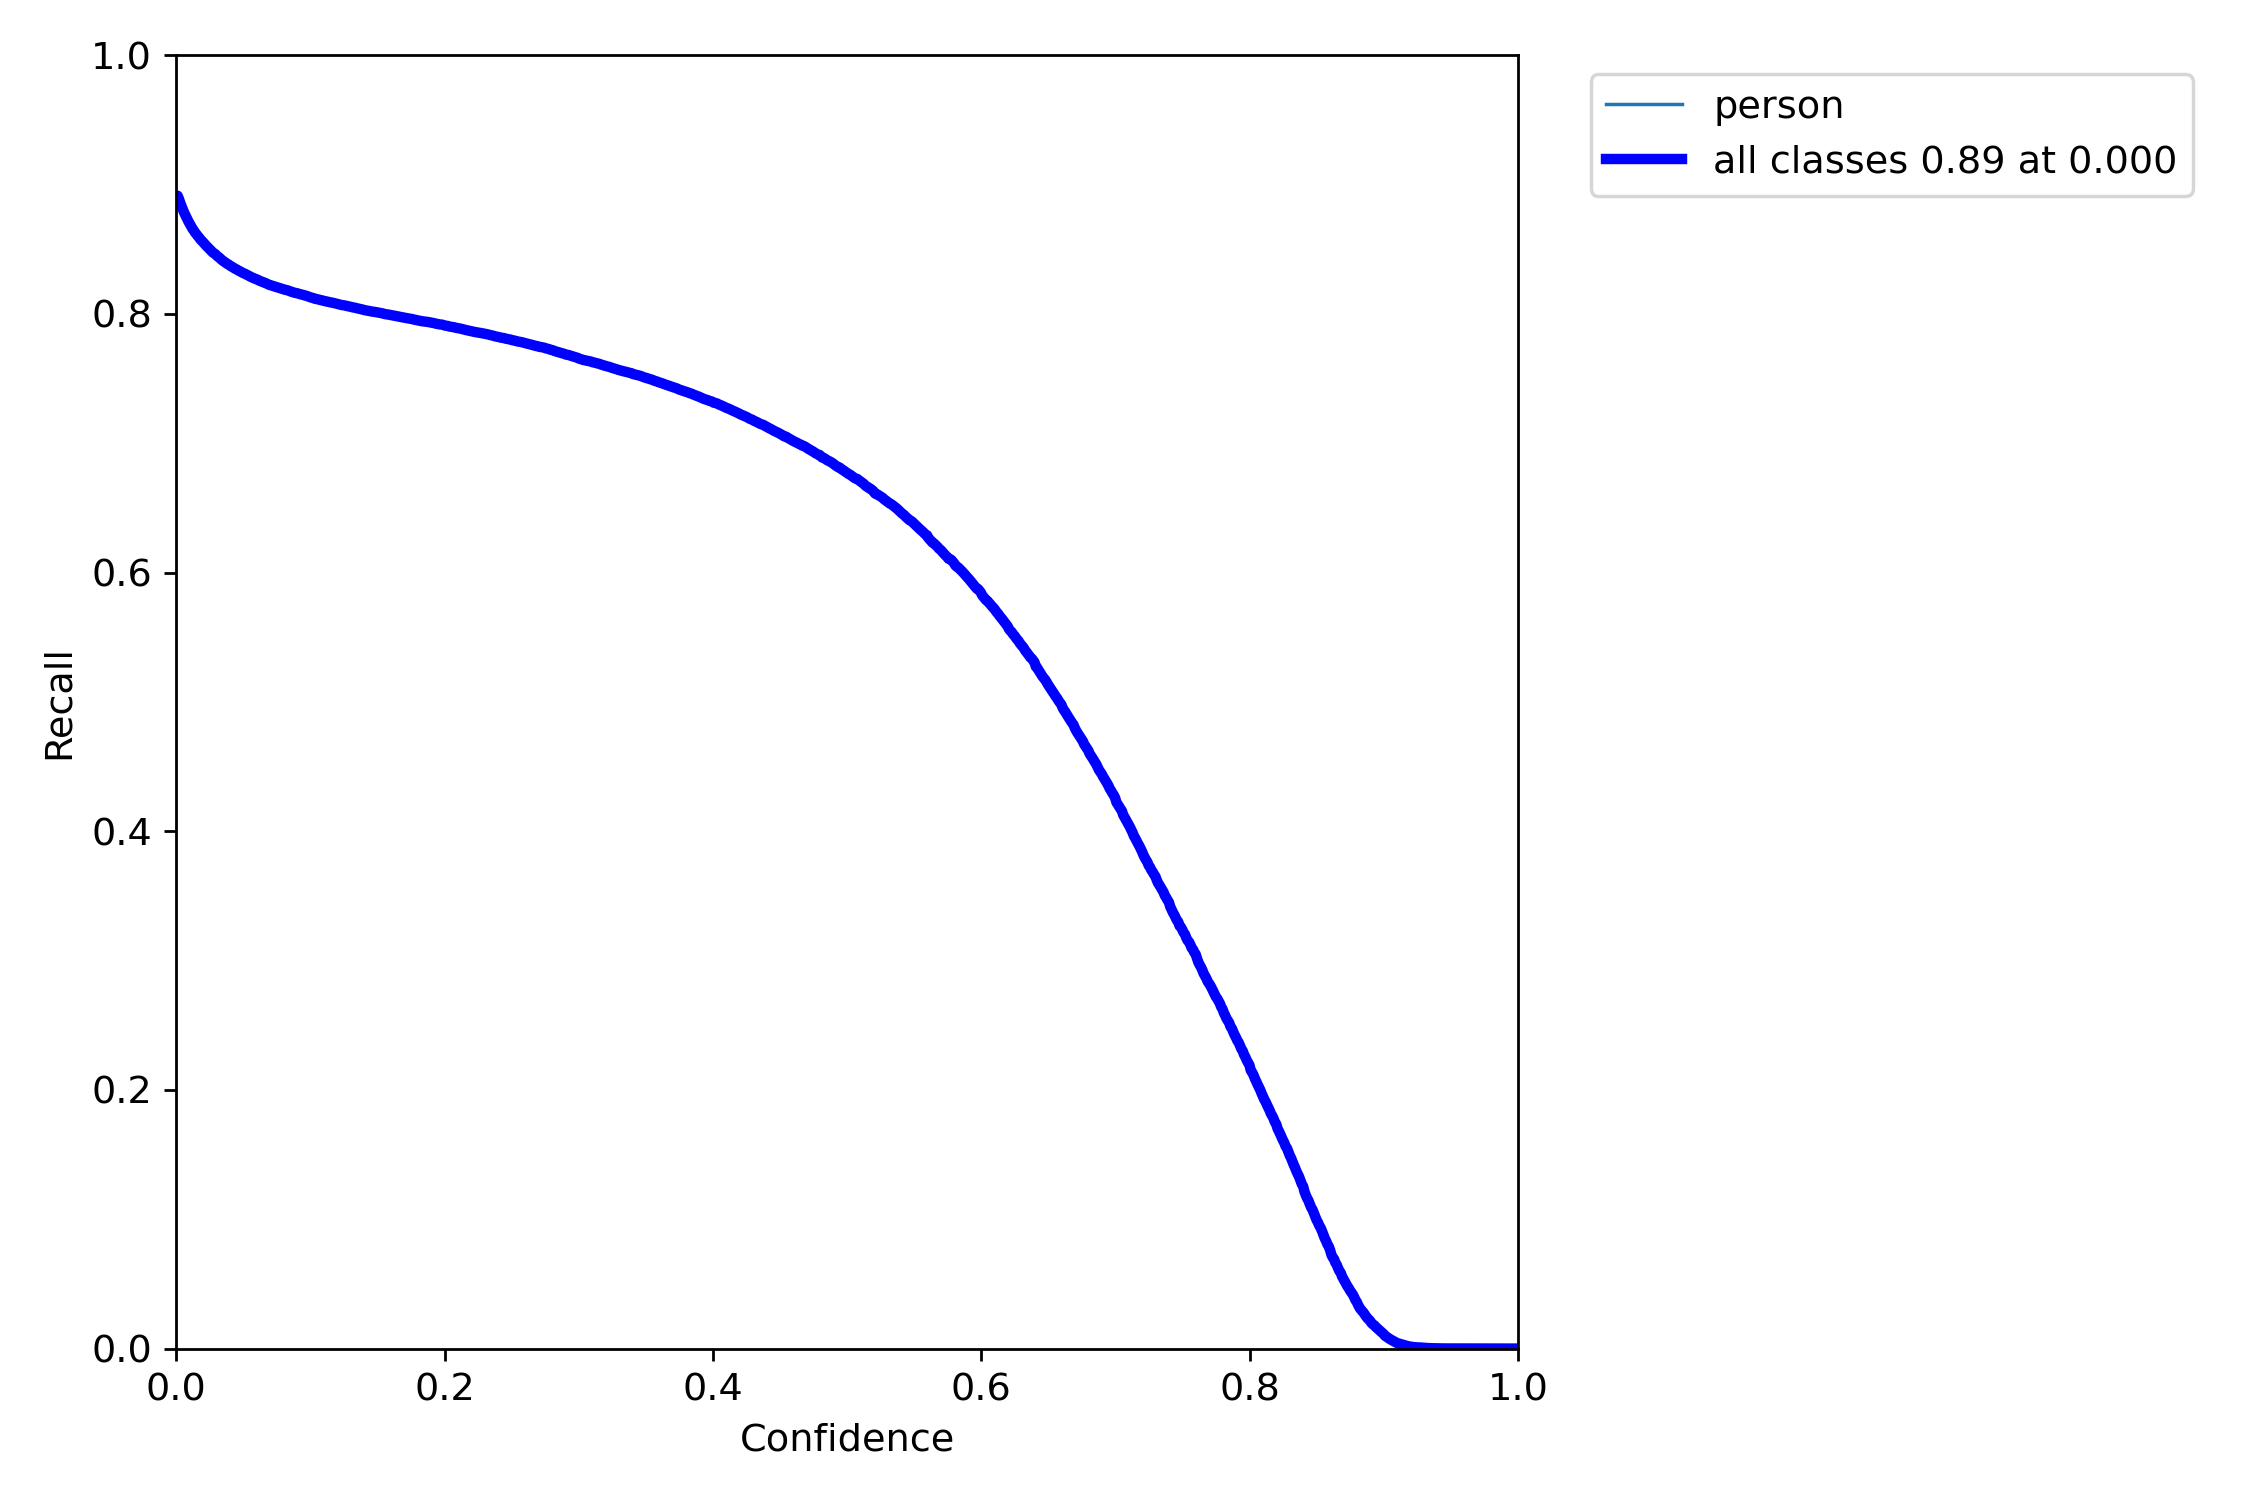

In [40]:
Image(filename=f"{results_base_path}/R_curve.png")

## Confusion Matrix

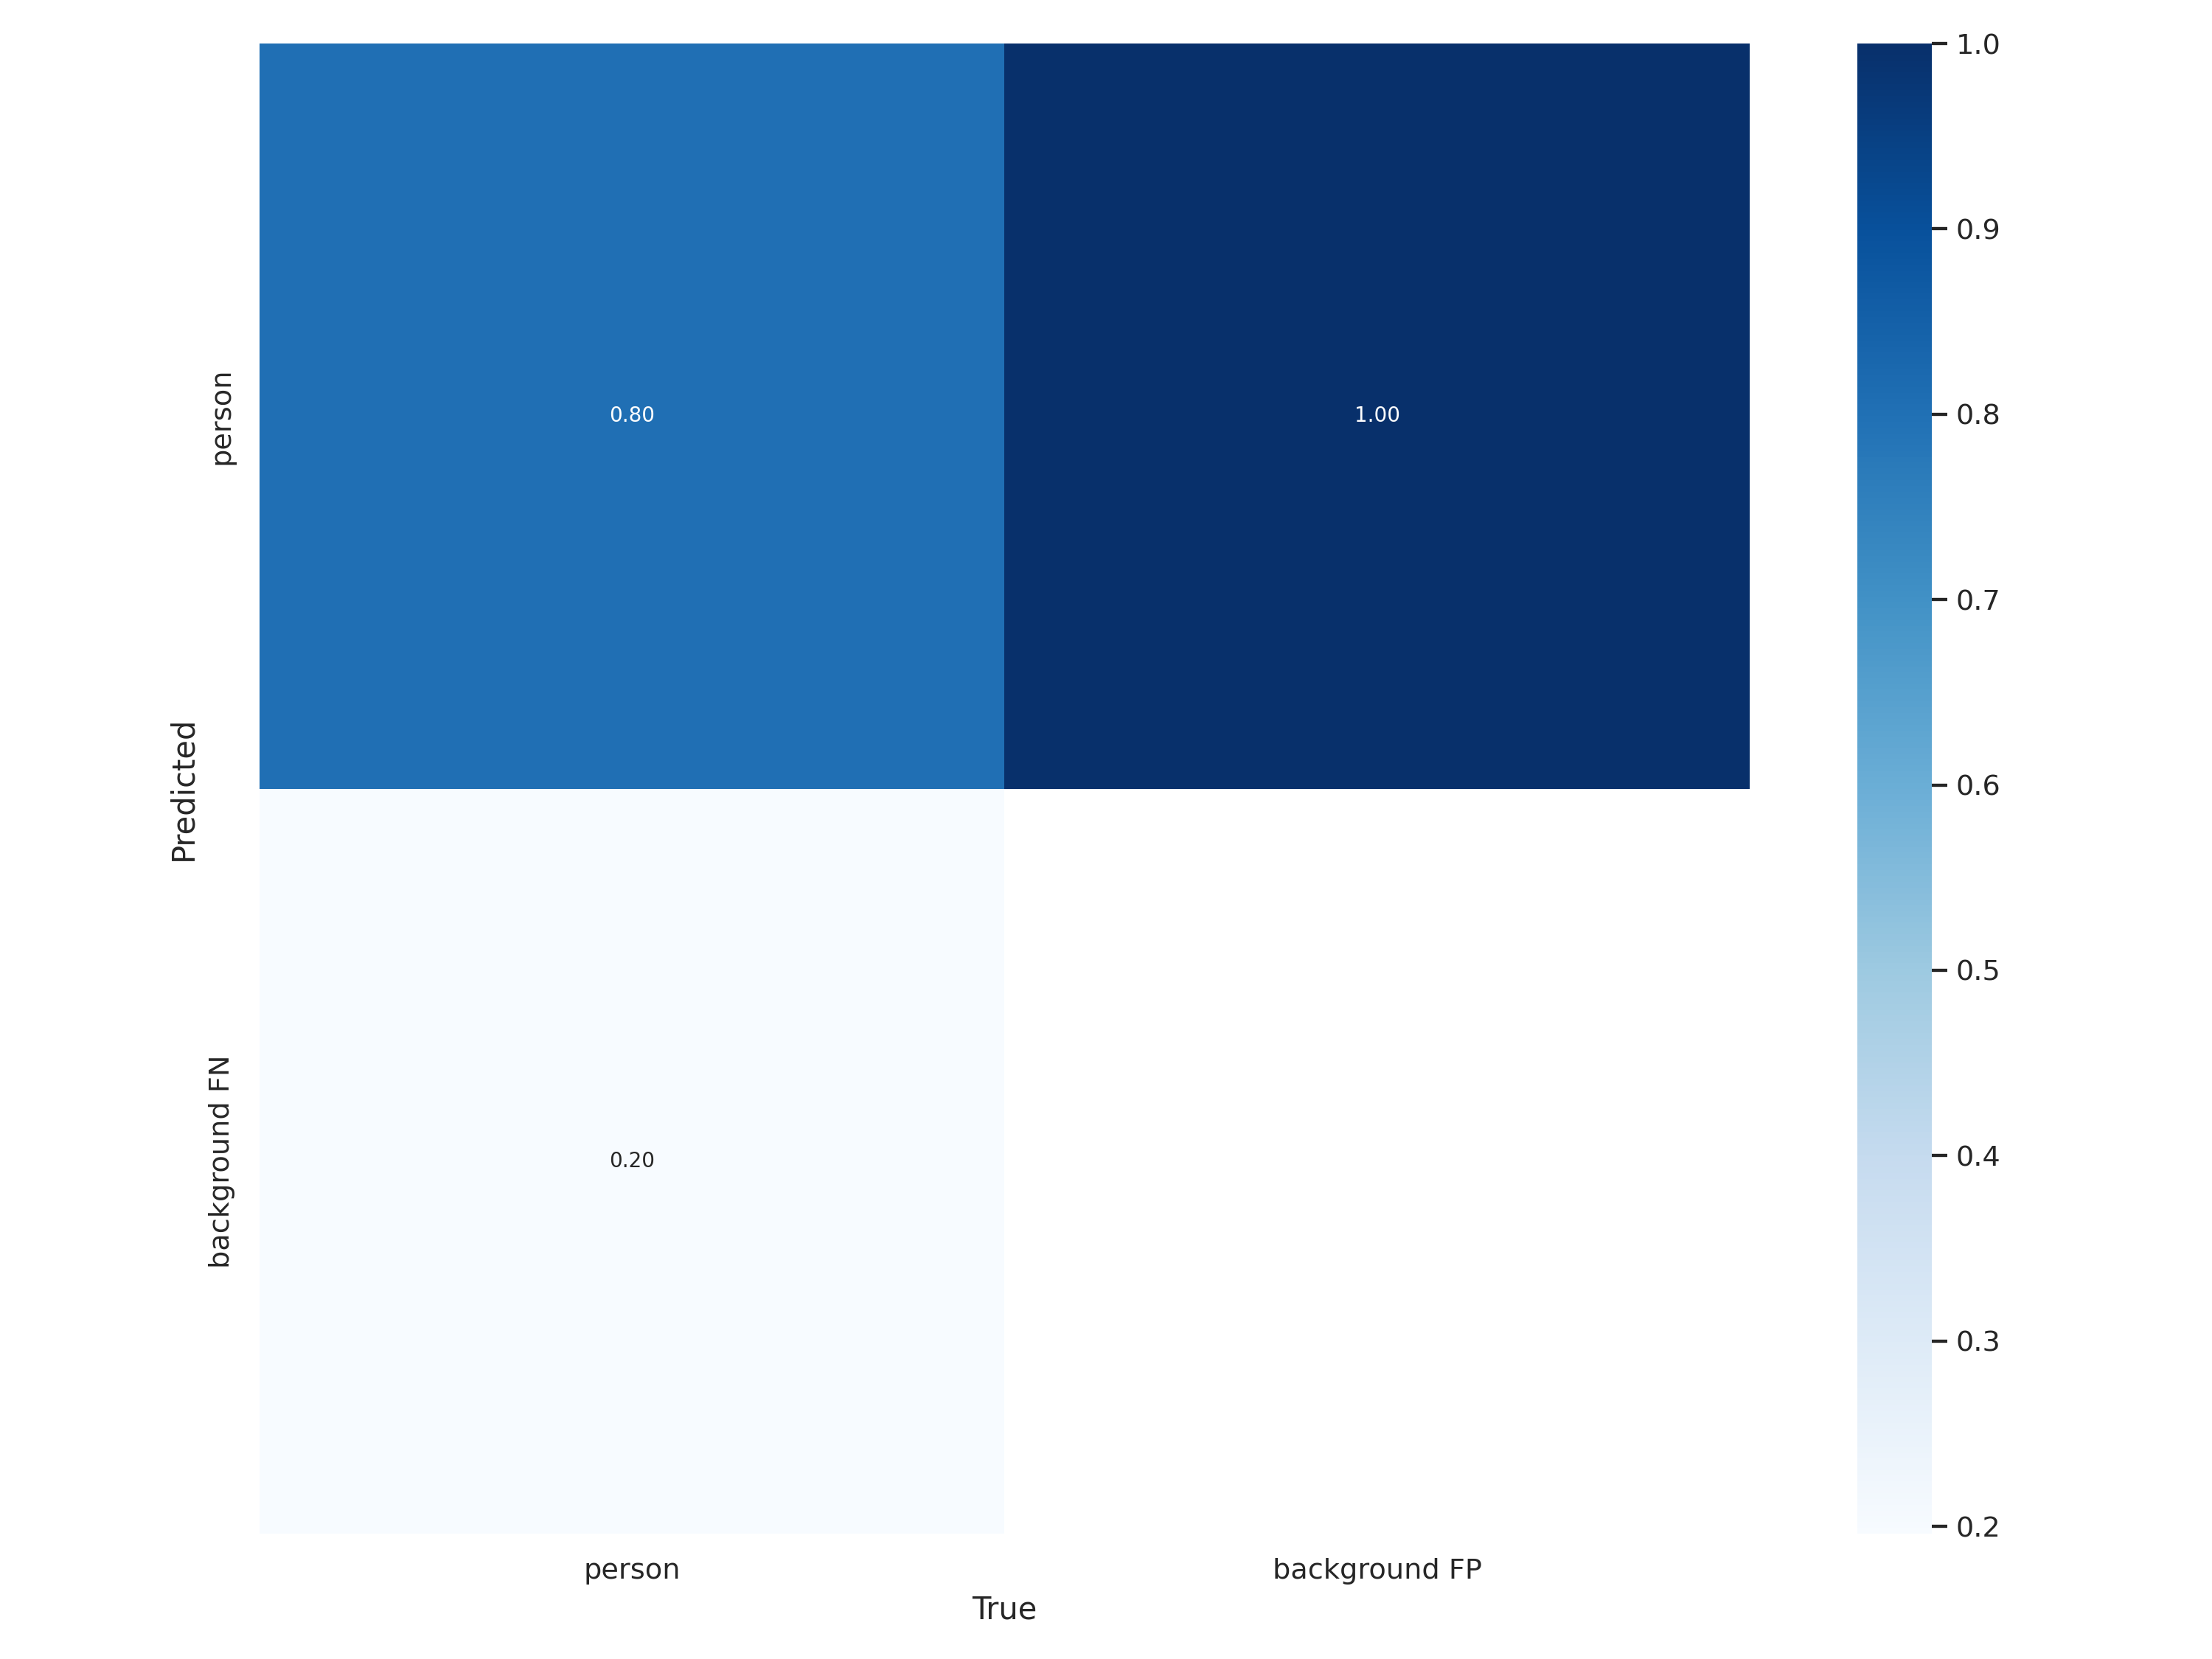

In [39]:
Image(filename=f"{results_base_path}/confusion_matrix.png")

## Overall Results

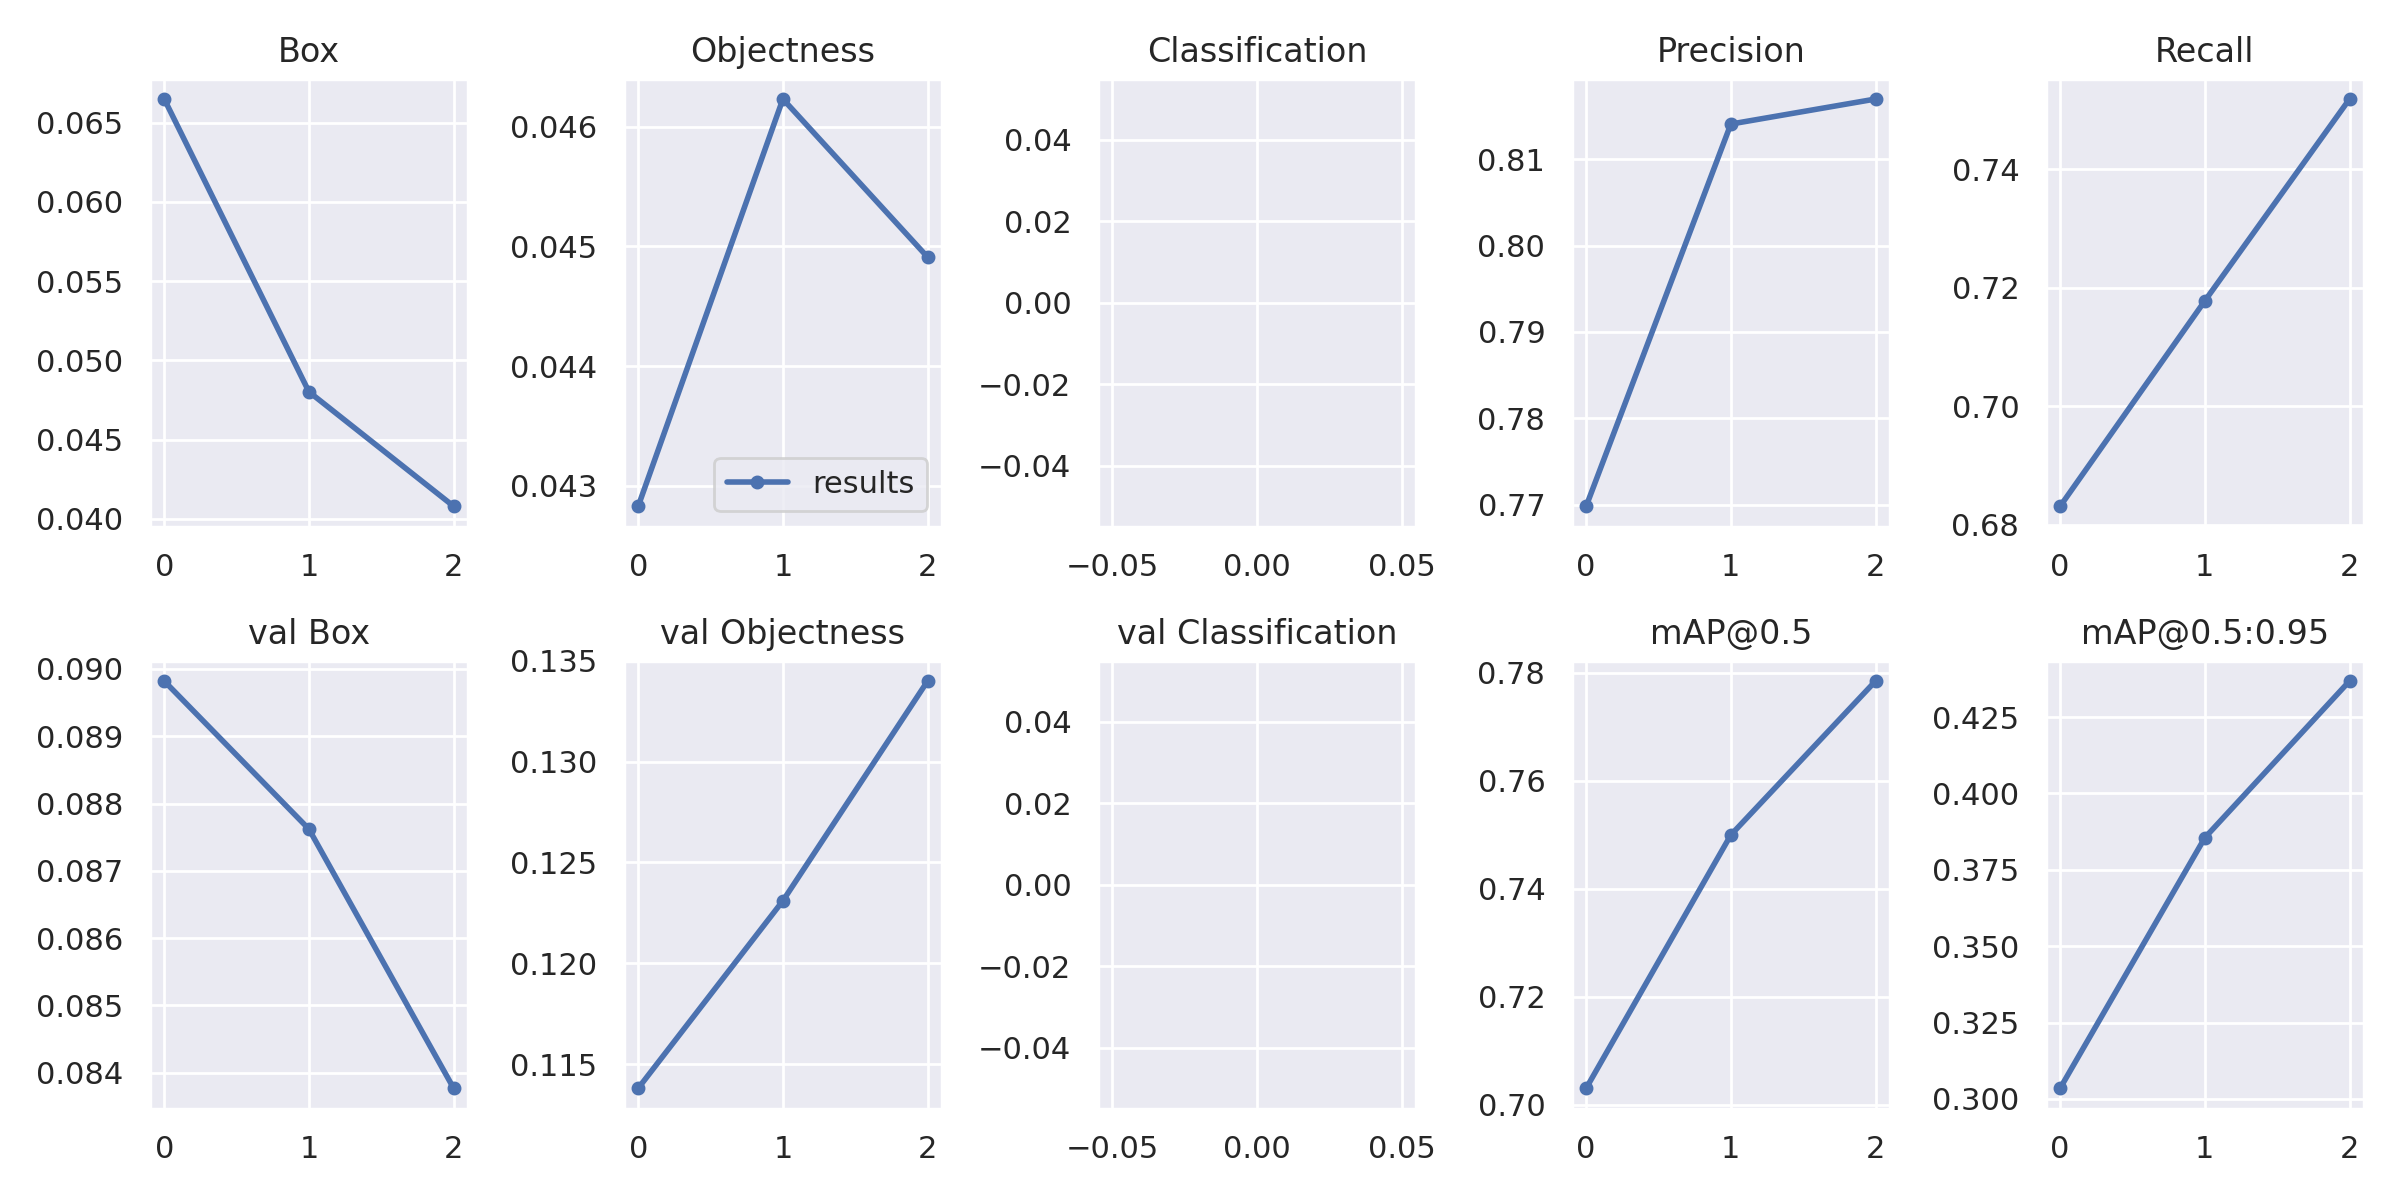

In [38]:
Image(filename=f"{results_base_path}/results.png")

# Download all the results from Kaggle to Local machine

In [52]:
import shutil
shutil.make_archive("c2a_using_yolov7_runs", 'zip', "/kaggle/working/yolov7/runs")

'/kaggle/working/yolov7/c2a_using_yolov7_runs.zip'